In [253]:
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage # dendrogram is a tree like hierarchical representation of points; linkage refers to the specific clustering method and distance used
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import pickle

## Import Data

In [201]:
# Import the dataset
df_segmentation = pd.read_csv("~/repos/vscode_repos/customer_analytics_2022/Data/segmentation data.csv", index_col = 0, 
                dtype = {"ID":str} )

## Explore Data

In [202]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [203]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


#### Means of categorical data does not really have meaning (eg 2 values); means just show the proportion of the respective categorical varaible distribution 

## Correlation Estimate

In [204]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


### Viz the correlations by heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

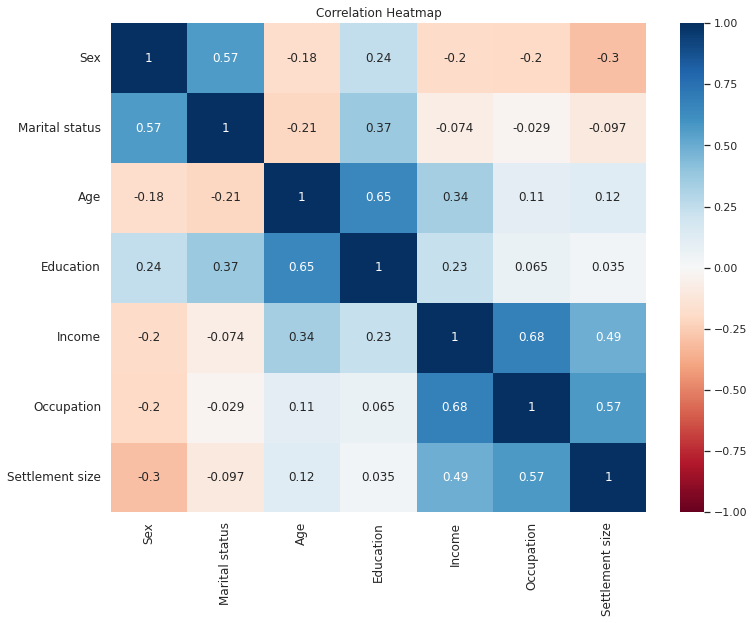

In [205]:
plt.figure(figsize= (12, 9))
s = sns.heatmap(df_segmentation.corr(),
                annot= True,
                cmap = "RdBu",
                vmin = -1,
                vmax = 1)

s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title("Correlation Heatmap")

## Visualize Raw Data

Text(0.5, 1.0, 'Visualation of raw data Income to Age')

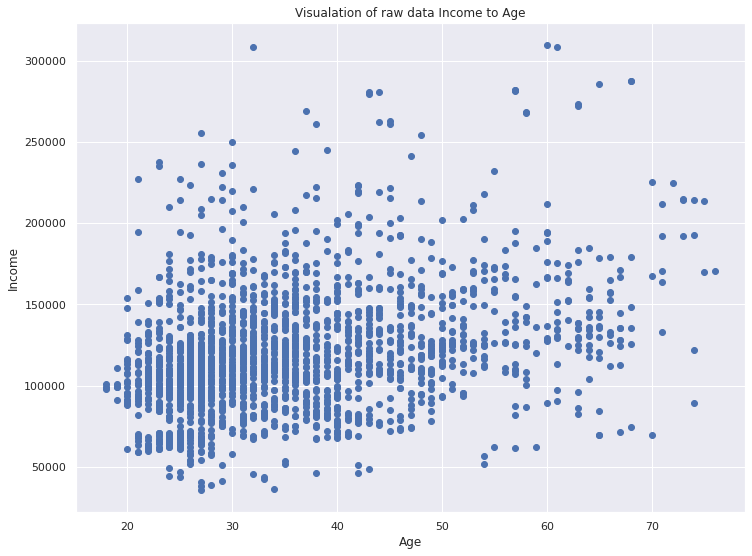

In [206]:
plt.figure(figsize= (12, 9))

# scatter income and age 
plt.scatter(df_segmentation.iloc[:, 2],
            df_segmentation.iloc[:, 4])

plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Visualation of raw data Income to Age")


## Standardization

In [207]:
# initialize the scaler
scaler = StandardScaler()

# fit transfrom 
segmentation_std = scaler.fit_transform(df_segmentation)

## Hierarchical Clustering 

In [208]:
hier_clust = linkage(segmentation_std, method = 'ward')

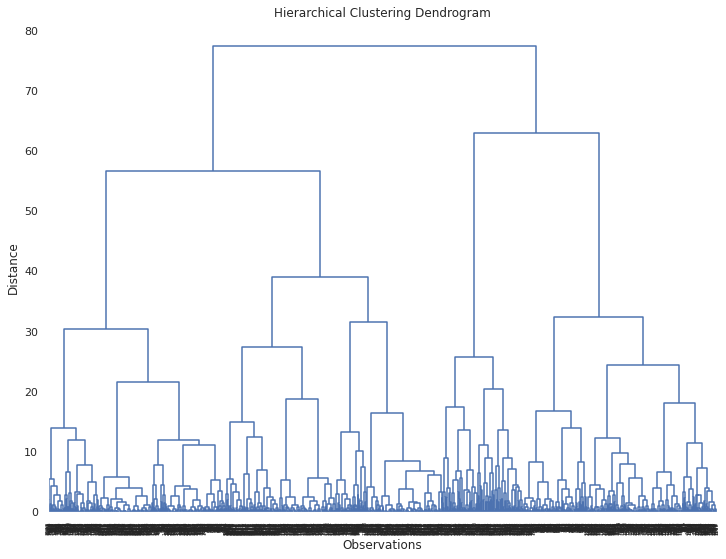

In [209]:
# plot it using it dendrogram
plt.figure(figsize = (12,9))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")

# calll the dendrogram function
dendrogram(hier_clust,
            show_leaf_counts = False,
            no_labels = False, 
            color_threshold= 0)
plt.show()

#### Truncate the size of the dendrogram so that not all 2000 observatiosn are being shown

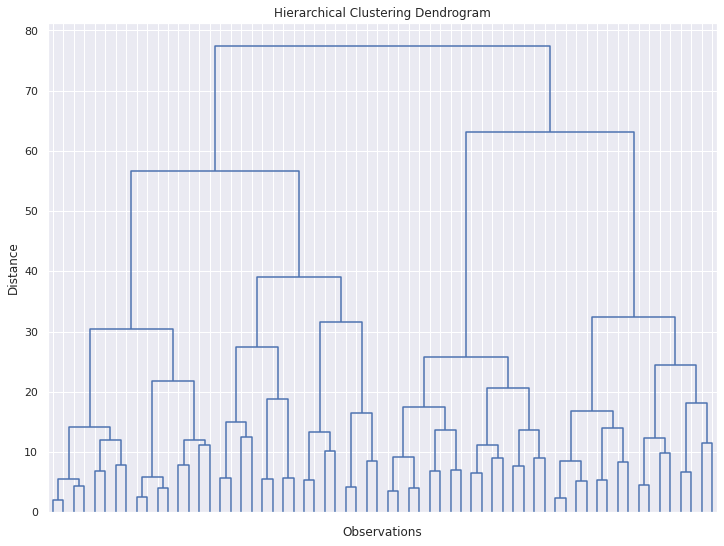

In [210]:
# plot it using it dendrogram
plt.figure(figsize = (12,9))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")

# calll the dendrogram function
dendrogram(hier_clust,
            # truncate  
            truncate_mode= 'level',
            p = 5, 

            show_leaf_counts = False,
            no_labels = False, 
            color_threshold= 0)
plt.show()

### Now display the solution by the algorithm

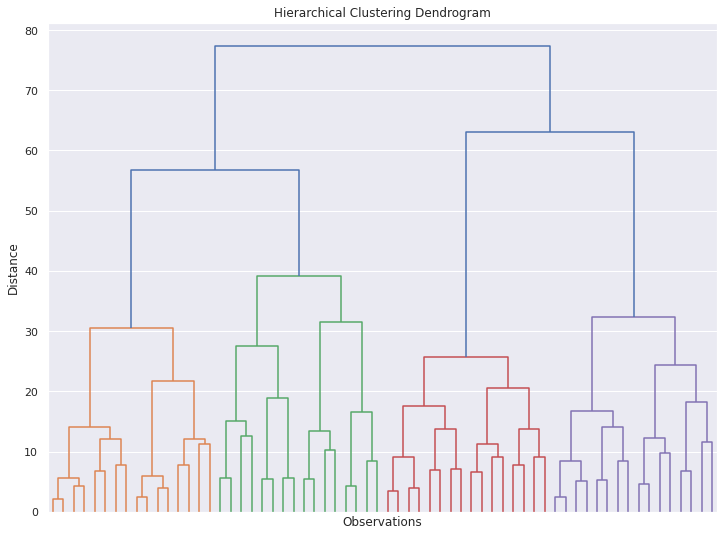

In [211]:
# plot it using it dendrogram
plt.figure(figsize = (12,9))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")

# calll the dendrogram function
dendrogram(hier_clust,
            # truncate  
            truncate_mode= 'level',
            p = 5, 

            show_leaf_counts = False,
            no_labels = True)
plt.show()

## K means clustering
#### remember that kmeans clustering minimizes the eucledian norm

In [212]:
# init the within cluster sum of squares varaible
wcss = []
for i in range(1,11):
    """
    each element in range resembles k = j; cluster size


    k-means++ is a greedy selection of datapoints

    with wcss you perform the within-cluster-sum-of-square analysis,
    wcss calculates the square distance of each point per cluster to its
    centroid, then sums it up and then sums all wcss form all clusters together
    

    """

    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    kmeans.fit(segmentation_std)
    # wcss is contained in the .inertia_ method of kmeans
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'K-Means clustering WCSS ')

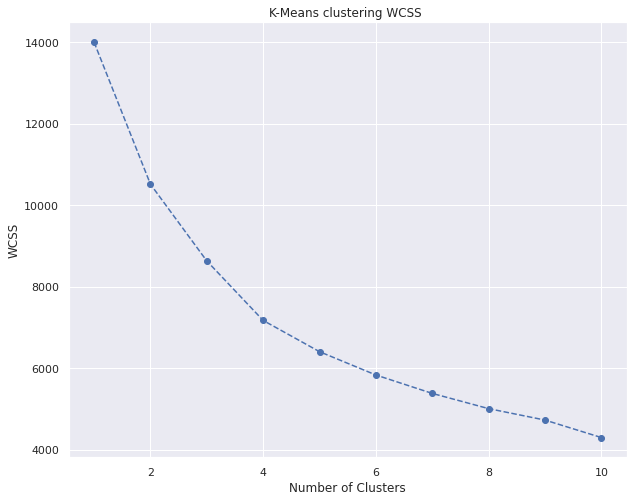

In [213]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker= 'o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means clustering WCSS ')

we see that the graph is deceasing monotonically; depending on the shape of this graph we make a decision about the number of clusters 

how do we choose how many clusters we want? We usethe Elbow method --> Chose where the graph is steeply declining 
--> Cluster k = 4

In [214]:
# so perfrom k means clustering with k = 4
# initialize the model
kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state=42)
# fit the model on the data 
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

## Results

In [215]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [216]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


 as we can see above: 
- the first segment (cluster 0); the cluster is evenly split between males and females; a majority (though not strong) is married (70%); the average age is considerably higher than that of other groups/clusters; the education level is higher than that of the other groups (though partially explained by the strong correlation between age and education); their income is also the largest; they tend to be skilled; and live in rather big cities
 Name: Well off old people
- second segment (cluster 1); 2/3rds is male; almost all are single; they are of medium age; low education; lowest income; lowest occupation qualitfication; and rather small cities
 Name: Lower income 
- third segment (cluster 2); mostly female; almost all in  relationships; youngest group; medium education; low to medium income; in medium emplyment and medium cities;
 Name: up and comming average
 - fourth segment (clsuter 3): All male, only 17% in relationships; medium age; lowest education; good income; highest level occupation; large city focus
 Name: urban high income males career focused

In [217]:
# count the observations in a cluster
df_segm_analysis['N Obs'] = df_segm_kmeans.reset_index().groupby(by = ['Segment K-means']).agg({'ID':'count'})

In [218]:
# Proportion of observation in cluster j to total obs
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [219]:
# rename the clusters 
df_segm_analysis.rename({0: 'well-off',
                         1: 'fewer-opportunities',
                         2: 'standard',
                         3: 'Career-Focused'},
                         inplace = True)

In [220]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer-opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
Career-Focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


### Visualize the raw data based on segments

In [221]:
# change the names of the different clusters for each individual observation
# by applying the map method 
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0: 'well-off',
                                                                1: 'fewer-opportunities',
                                                                2: 'standard',
                                                                3: 'Career-Focused'})

/home/angelo/repos/vscode_repos/customer_analytics_2022/lib64/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


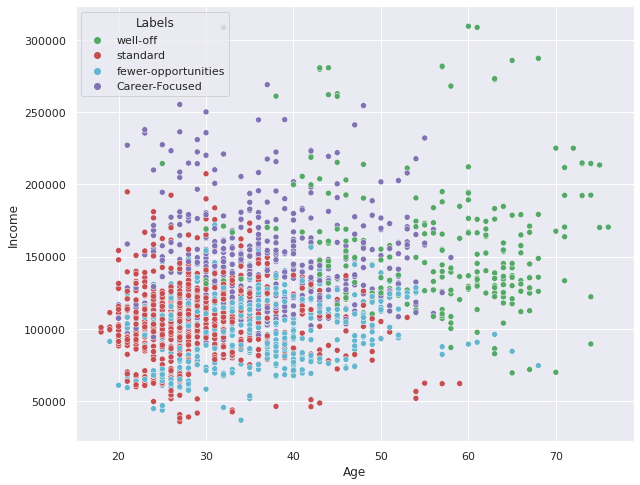

In [222]:
plt.figure(figsize = (10, 8))
sns.scatterplot(df_segm_kmeans.Age, 
                df_segm_kmeans.Income, 
                hue = df_segm_kmeans.Labels,
                palette = ['g', 'r', 'c', 'm'])
plt.show()
None

Possibly PCA and dimension reduction makes it easier to segment the data visually 

## PCA 

In [223]:
# init the PCA instance
pca = PCA()

In [224]:
# fit the data on the instance
pca.fit(segmentation_std)

PCA()

In [225]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

In [226]:
pca.explained_variance_

array([2.49999294, 1.83848387, 1.31813707, 0.52930714, 0.40035601,
       0.27697405, 0.14025067])

/home/angelo/repos/vscode_repos/customer_analytics_2022/lib64/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Explained variance by components')

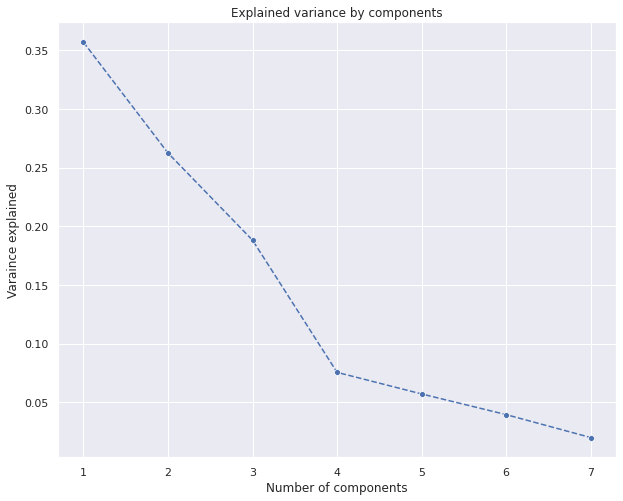

In [227]:
plt.figure(figsize = (10,8))
sns.lineplot(list(range(1, 1+ len(pca.explained_variance_ratio_))),
                pca.explained_variance_ratio_,
                marker='o',
                linestyle = '--')
plt.ylabel('Varaince explained')
plt.xlabel('Number of components')
plt.title('Explained variance by components')
                

/home/angelo/repos/vscode_repos/customer_analytics_2022/lib64/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Explained variance by components')

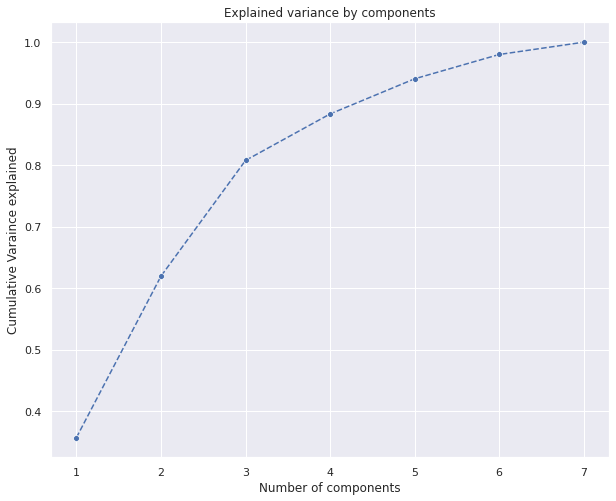

In [228]:
# plot cumulative variance explaind by the number of components
plt.figure(figsize = (10,8))
sns.lineplot(list(range(1, 1+ len(pca.explained_variance_ratio_))),
                pca.explained_variance_ratio_.cumsum(),
                marker='o',
                linestyle = '--')

plt.ylabel('Cumulative Varaince explained')
plt.xlabel('Number of components')
plt.title('Explained variance by components')

with 2 components we keep around 63% of the intial variablity; with 4 components we keep almost 90% of the initial variablity.

--> how many to choose? Keep around 80% of the initial variance; eg 3.

In [229]:
# now specify the desired number of components you want to extract in the ini of pca
pca_3 = PCA(n_components=3)

In [230]:
pca_3.fit(segmentation_std)

PCA(n_components=3)

## PCA Results

In [231]:
pca_3.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [232]:
df_pca_comp = pd.DataFrame(data = pca_3.components_,
                        columns = df_segmentation.columns.values,
                        index = ['Component 1', 'Component 2', 'Component 3'])

In [233]:
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


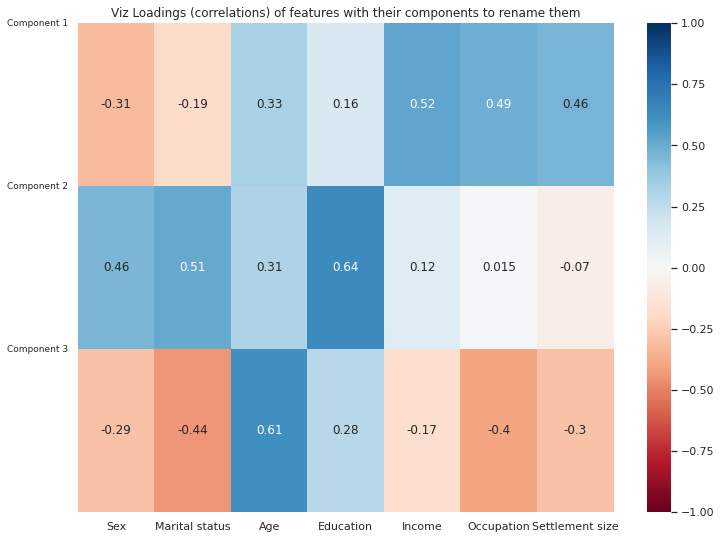

In [234]:
plt.figure(figsize = (12, 9))
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
            annot = True)

plt.yticks([0,1,2],
            ['Component 1', 'Component 2', 'Component 3'],
            rotation = 0,
            fontsize = 9)
plt.title('Viz Loadings (correlations) of features with their components to rename them')
None

- positive correltation between income, occupation, settlement sizem and age --> for component 1; this shows the career focus of this particualr individual

- component 2 is mostly described by the strong education, marital status, sex ,and also age!! Important: the career focused components load almost nothing on this component; This components summarieses the liefstyle and education but not the career

- component 3 is mostly described by age (positive loading) and (negative loading on) marital status and occupation -- so this component indicates the experience and age (so older maybe divorced people)

In [235]:
scores_pca = pca_3.transform(segmentation_std)

In [236]:
scores_pca


array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

## k-means clustering with PCA 

In [237]:
# init the within cluster sum of squares varaible
wcss = []
for i in range(1,11):
    """
    each element in range resembles k = j; cluster size


    k-means++ is a greedy selection of datapoints

    with wcss you perform the within-cluster-sum-of-square analysis,
    wcss calculates the square distance of each point per cluster to its
    centroid, then sums it up and then sums all wcss form all clusters together
    

    """

    kmeans_pca = KMeans(n_clusters=i, init = 'k-means++', random_state = 42)
    # here the data is fit
    kmeans_pca.fit(scores_pca)
    # wcss is contained in the .inertia_ method of kmeans
    wcss.append(kmeans_pca.inertia_)

Text(0.5, 1.0, 'K-Means PCA clustering WCSS ')

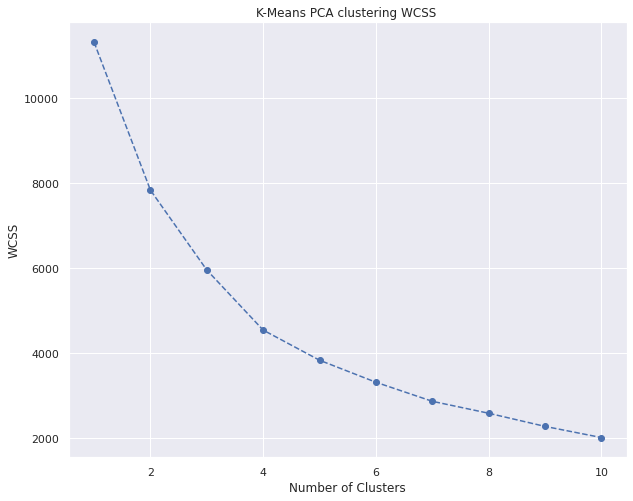

In [238]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker= 'o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-Means PCA clustering WCSS ')

In [239]:
# 4 clusters are good
kmeans_pca_4 = KMeans(n_clusters= 4, init = 'k-means++', random_state = 42)

In [240]:
# fit the kmeans_pca_4 MODEL onto the data of scores_pca!!!!
kmeans_pca_4.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

## K-means clustering with PCA results

Combine the original segmentation dataset and the scores of the pca per indicidual record (row); 

In [241]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True),
                            pd.DataFrame(scores_pca)], 
                            axis = 1)
df_segm_pca_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca_4.labels_

In [242]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [243]:
# gain sinsights
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


Even though the clusters are now a little different simply because of PCA we lost some variance, we can expect that they are somewhat similar as what it was before 

Remember:
- component 1 describes career
- component 2 describes education lifestyle 
- component 3 describes life or work experience

Analysis of clusters wrt components
- cluster 1: strong in component 2; weak in component 1 and 3 --> standard cluster
- cluster 2: strong in component 1; weak in component 2 --> seems like career focused 
- cluster 3: strong in component 3; weak in component 1 and 2 --> seems to be fewer opportunites cluster
- cluster 3; strong in component 1 & 2 & 3 --> Well off segment

In [244]:
# add the number of people per cluster
df_segm_pca_kmeans_freq['Total Number'] = df_segm_pca_kmeans.reset_index().groupby(by = ['Segment K-means PCA']).index.count()

In [245]:
# proportion
df_segm_pca_kmeans_freq['prop total number'] = df_segm_pca_kmeans_freq['Total Number'] / df_segm_pca_kmeans_freq['Total Number'].sum()

In [246]:
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Total Number,prop total number
Segment K-means PCA,,,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [247]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,2
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [248]:
# change the names of the different clusters for each individual observation
# by applying the map method 
df_segm_pca_kmeans['Labels'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0: 'well-off',
                                                                1: 'fewer-opportunities',
                                                                2: 'standard',
                                                                3: 'Career-Focused'})

/home/angelo/repos/vscode_repos/customer_analytics_2022/lib64/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


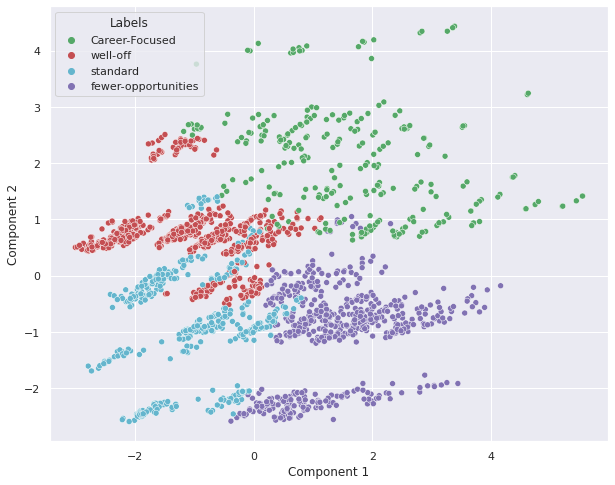

In [249]:
# visualize by using only two components;
#  use the first two components because they contain the most information
plt.figure(figsize = (10, 8))
sns.scatterplot(df_segm_pca_kmeans['Component 1'], 
                df_segm_pca_kmeans['Component 2'], 
                hue = df_segm_pca_kmeans.Labels,
                palette = ['g', 'r', 'c', 'm'])
plt.show()
None


## Data Export to use it later using Pickle

pickle turns python objects into strings

In [255]:
# export the scaler for later use
# the scaler is used becasue you want to apply the same scaler at a later stage
pickle.dump(scaler, open("scaler.pickle", "wb"))

# export the pca
# the pca contains the model that can be fit on the "normal" data containing the 2000 observations
# this way, the 7 features are represented using 3 components for each individual observarion/user
pickle.dump(pca_3, open("pca.pickle", "wb"))

# export kmeans_pca
# the pca just assigns each observation one of the four clusters cluster; this way we can replicate the same clustering with later data; 
pickle.dump(kmeans_pca_4, open("pca.pickle", "wb"))
